<a href="https://colab.research.google.com/github/pa-gaspar/house-prices-kaggle/blob/main/HousePrices_R01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### KAGGLE IMPORTER

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'house-prices-advanced-regression-techniques:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F5407%2F868283%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240726%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240726T203753Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D442eb352eabf81c575ed89daf40982d34e561c61ebbf219479de288c658057342a1900cfde7b1095aac9925767e4b271dad39ea19cda3b2616087d07121a3ac3a3969ca4e219df8623d19f0ca47a866ab310cfc9189e6cce453a372bf6afe74f90de58eea428097acfd8811180f8e435e6946ef4b0222501ba8d553398161a7fe3b2fc929f9b07938d0f4641308f054634685444d78b85b573bf866b97ebf6b8711c3289a6b63c1719d1772d6fd7e7d131bb23b06c2c76ed2aedadf98b0b5d2a6878f50fec1c6759261169c540f445609ec440bbe90d562a16a7a04b908bb9d1fde14c37057f3de13b6bf98f154c16ed0251f03c58d707507a9e454f0786343a'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


## **Importing Libraries.**

In [ ]:
import numpy as np #calculo numérico
import pandas as pd #transformação de dados
import matplotlib.pyplot as plt #plotagem
from matplotlib import font_manager
import seaborn as sns #plotagem

from imblearn.over_sampling import SMOTE #para adequar conjunto de dados
import itertools # ajuda com iteradores (os números do for)
import warnings #avisos do python
import plotly.express as px #plotagem
import time #tempo

%matplotlib inline
sns.set(style='darkgrid', font_scale=1.4)
warnings.filterwarnings('ignore')

# Sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import eli5 #ajuda a facilitar o entendimento dos modelos
from eli5.sklearn import PermutationImportance
from sklearn.utils import resample

# Models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from xgboost import XGBClassifier #decision trees's models
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB

2024-05-22 11:52:45.443539: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-22 11:52:45.443719: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-22 11:52:45.600483: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Reading the dataset

In [ ]:
#train_v0: train dataset with no editions
train_v0 = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
#test_v0: test dataset with no editions
test_v0 = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

print('train_v0 shape',train_v0.shape)
print('test_v0 shape',test_v0.shape)
print('\n ')
print(train_v0.info())
print('\n ')
print(test_v0.info())

#print(train_v0.head())
#print('\n ')
#print(train_v0.describe())
#print('\n ')
/



train_v0 shape (1460, 81)
test_v0 shape (1459, 80)

 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17

()

## Understanding the Data

### Loking at the Features

Looking at the features:

**Descriptive**
* Id (Descritive)


**Categorical**
* MSSubClass: Identifies the type of dwelling involved in the sale.	)
* MSZoning: Identifies the general zoning classification of the sale.
* Street: Type of road access to property
* Alley: Type of alley access to property
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to various conditions
* Condition2: Proximity to various conditions (if more than one is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Rates the overall material and finish of the house
* OverallCond: Rates the overall condition of the house
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* ExterQual: Evaluates the quality of the material on the exterior
* ExterCond: Evaluates the present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Evaluates the height of the basement
* BsmtCond: Evaluates the general condition of the basement
* BsmtExposure: Refers to walkout or garden level walls
* BsmtFinType1: Rating of basement finished area
* BsmtFinType2: Rating of basement finished area (if multiple types)
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* KitchenQual: Kitchen quality
* Functional: Home functionality (Assume typical unless deductions are warranted)
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageFinish: Interior finish of the garage
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MoSold: Month Sold (MM)
* SaleType: Type of sale
* SaleCondition: Condition of sale

**Continuous**
* LotFrontage: Linear feet of street connected to property
* LotArea Lot size in square feetLot size in square feet (continuous)
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
* MasVnrArea: Masonry veneer area in square feet
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Bedrooms above grade (does NOT include basement bedrooms)
* Kitchen: Kitchens above grade
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Fireplaces: Number of fireplaces
* GarageYrBlt: Year garage was built
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* MiscVal: Value of miscellaneous feature
* YrSold: Year Sold (YYYY)

### **Missing Values:**

In [ ]:
print("Train set missing values:")
print(train_v0.isna().sum()[train_v0.isna().sum() > 0])
print("/n")
print("Test set missing values:")
print(test_v0.isna().sum()[test_v0.isna().sum() > 0])
#train_v0.nunique()

Train set missing values:
LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64
/n
Test set missing values:
MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType       894
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCar

### **Duplicates:**

In [ ]:
print(f'Duplicates in train sets: {train_v0.duplicated().sum()} - ({np.round(100*train_v0.duplicated().sum()/len(train_v0),2)}%)')
print('')
print(f'Duplicates in test sets: {test_v0.duplicated().sum()} - ({np.round(100*test_v0.duplicated().sum()/len(test_v0),2)}%)')

Duplicates in train sets: 0 - (0.0%)

Duplicates in test sets: 0 - (0.0%)


# EXPLORATORY DATA ANALYSYS



## Target  Distribution
First, let's take a look at the distribution of the target column 'SalesPrice

Text(0, 0.5, 'Frequency')

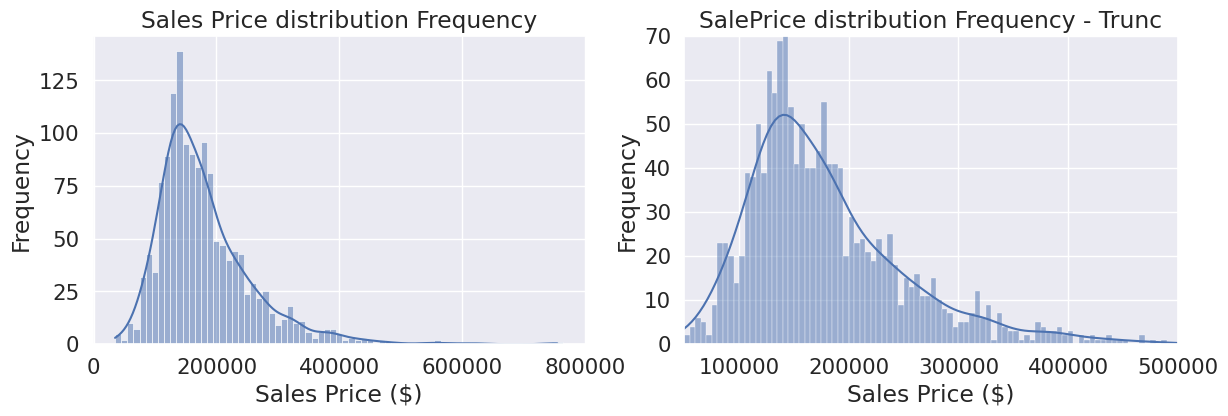

In [ ]:
# Figure size
fig = plt.figure(figsize=(14,4))

ax=fig.add_subplot(1,2,1)
# Histogram
sns.histplot(data=train_v0, x='SalePrice',kde=True,binwidth=10000)
# Aesthetics
plt.title('Sales Price distribution Frequency')
plt.xlabel('Sales Price ($)')
plt.ylabel('Frequency')


ax=fig.add_subplot(1,2,2)
# Histogram
sns.histplot(data=train_v0, x='SalePrice',kde=True,binwidth=5000)
plt.xlim([50000,500000])
plt.ylim([0,70])
# Aesthetics
plt.title('SalePrice distribution Frequency - Trunc')
plt.xlabel('Sales Price ($)')
plt.ylabel('Frequency')


## Analysing Categorical Features

### Fill NA and missing values

Let's create a list with only the categorical features and change the Nan Values.

In [ ]:
categorical_features = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
                        'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
                        'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl','Exterior1st', 'Exterior2nd', 'MasVnrType',
                        'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                        'BsmtFinType2','Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
                        'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
                        'Fence', 'MiscFeature', 'MoSold', 'SaleType', 'SaleCondition']


train_v0[categorical_features] = train_v0[categorical_features].fillna('Null')

print("Train set missing values:")
print(train_v0.isna().sum()[train_v0.isna().sum() > 0])
print("/n")
print(train_v0.info())


test_v0[categorical_features] = test_v0[categorical_features].fillna('Null')

print("Test set missing values:")
print(test_v0.isna().sum()[test_v0.isna().sum() > 0])
print("/n")
print(train_v0.info())





Train set missing values:
LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64
/n
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 1

### Countplots

Let's take a look on the countplot of the categorical features:

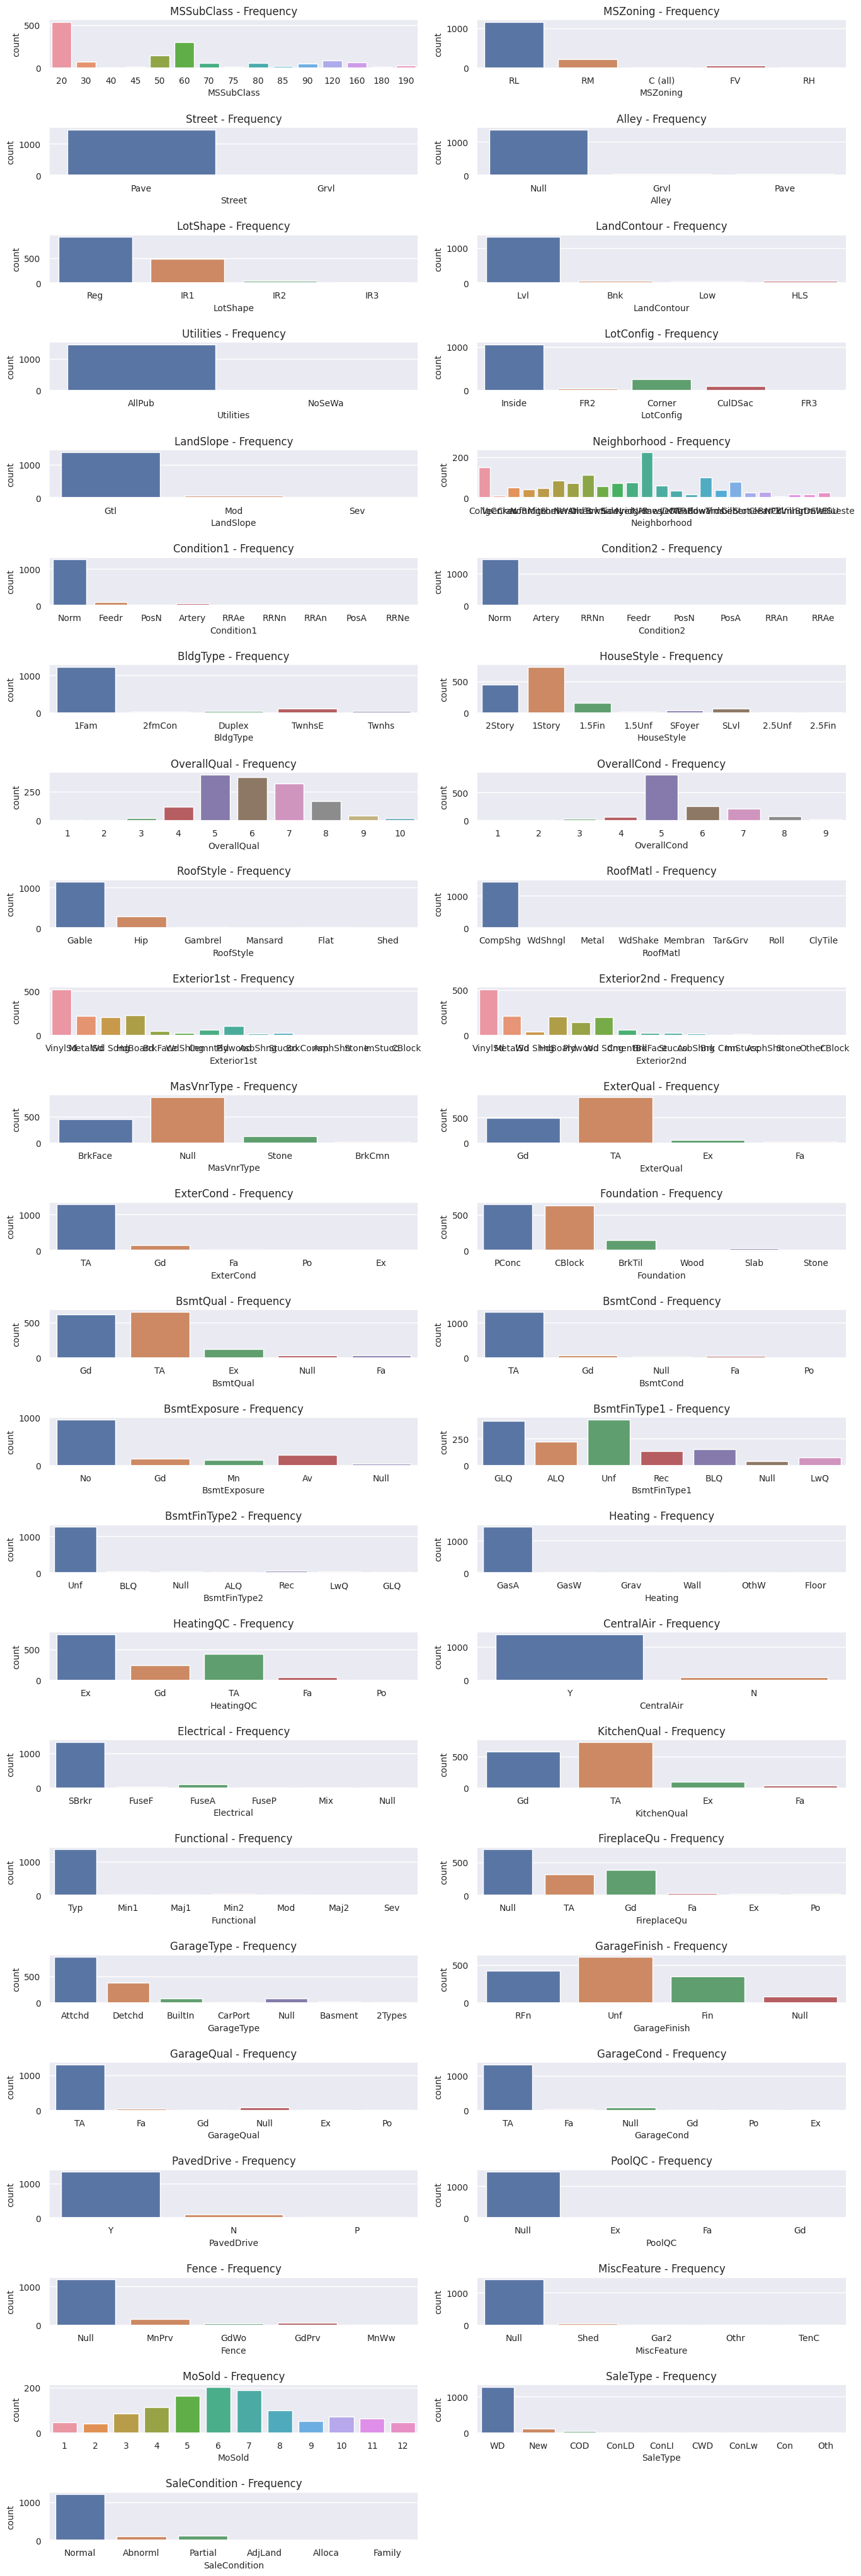

In [ ]:

fig = plt.figure(figsize=(14,80))
plt.rcParams['axes.labelsize'] = 10
for i, feat in enumerate(categorical_features):
    ax=fig.add_subplot( int(len(categorical_features)+1/2),2,i+1)
    sns.countplot(data=train_v0, x=feat)
    ax.set_title(f'{feat} - Frequency', fontsize=12)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)


fig.tight_layout()  # Improves appearance a bit
plt.show()



Some Columns have a big predominance of just one value. Lets take a look on them.

In [ ]:
cat_feat_just_one_pred = ['Street','Alley','LandContour', 'Utilities','LandSlope', 'Condition1','Condition2','BldgType','RoofMatl',
                            'ExterCond','BsmtCond','BsmtFinType2','Heating',
                            'CentralAir','Electrical','Functional','GarageQual',
                            'GarageCond','PavedDrive','PoolQC','MiscFeature','SaleType',
                            'SaleCondition']

for feat in cat_feat_just_one_pred:
    print(train_v0[feat].value_counts(normalize=True)*100)
    print('\n')


Street
Pave    99.589041
Grvl     0.410959
Name: proportion, dtype: float64


Alley
Null    93.767123
Grvl     3.424658
Pave     2.808219
Name: proportion, dtype: float64


LandContour
Lvl    89.794521
Bnk     4.315068
HLS     3.424658
Low     2.465753
Name: proportion, dtype: float64


Utilities
AllPub    99.931507
NoSeWa     0.068493
Name: proportion, dtype: float64


LandSlope
Gtl    94.657534
Mod     4.452055
Sev     0.890411
Name: proportion, dtype: float64


Condition1
Norm      86.301370
Feedr      5.547945
Artery     3.287671
RRAn       1.780822
PosN       1.301370
RRAe       0.753425
PosA       0.547945
RRNn       0.342466
RRNe       0.136986
Name: proportion, dtype: float64


Condition2
Norm      98.972603
Feedr      0.410959
Artery     0.136986
RRNn       0.136986
PosN       0.136986
PosA       0.068493
RRAn       0.068493
RRAe       0.068493
Name: proportion, dtype: float64


BldgType
1Fam      83.561644
TwnhsE     7.808219
Duplex     3.561644
Twnhs      2.945205
2fmCon    

### Sale Price Distribution in categorical columns

Sales Price distribution by every categorical column:

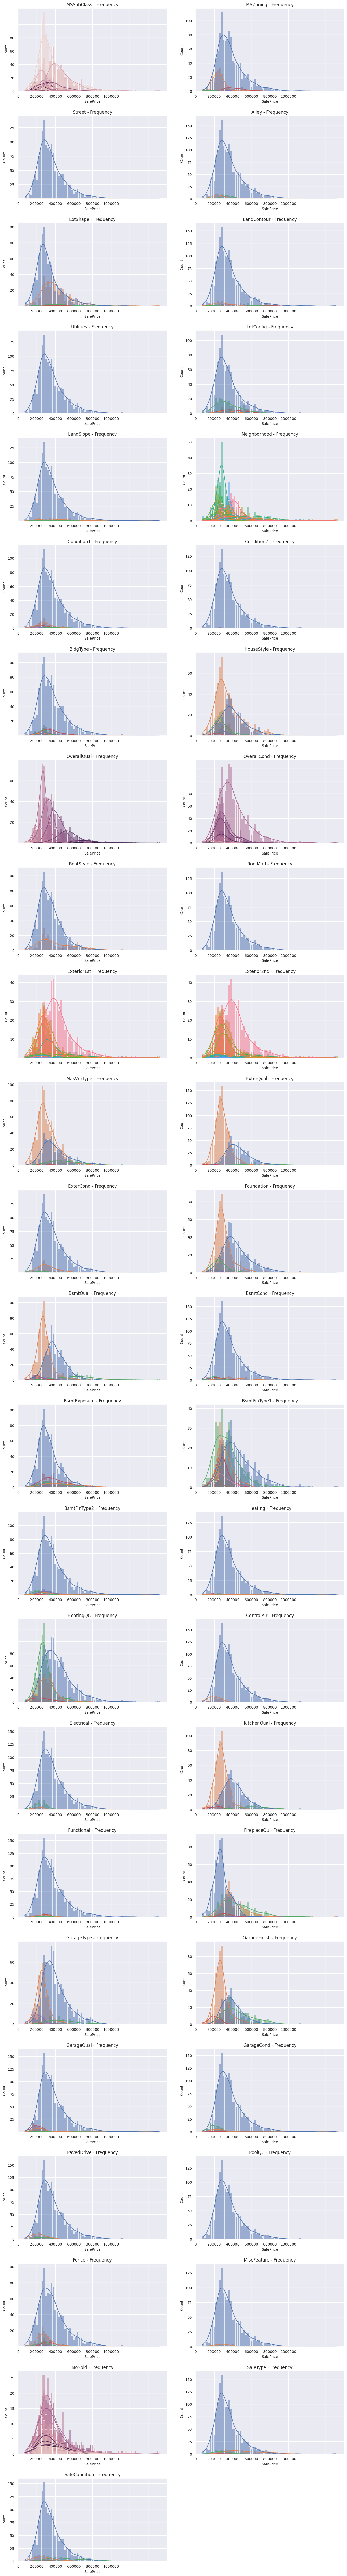

In [ ]:
fig = plt.figure(figsize=(14,100))


for i, feat in enumerate(categorical_features):
    ax=fig.add_subplot( int((len(categorical_features)+1)/2),2,i+1)

    sns.histplot(data=train_v0, x='SalePrice', hue=feat, binwidth=10000, kde=True)

    ax.set_title(f'{feat} - Frequency', fontsize=12)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)
    ax.legend(fontsize=0)



fig.tight_layout()  # Improves appearance a bit
plt.show()




Probably Drop (> 92%)
'Alley'
'LandSlope'
'CentralAir'
'Functional'
'MiscFeature'

DefinitelyDrop (> 97%)
'Street'
'Utilities'
'Condition2'
'RoofMatl'
'Heating'
'PoolQC'


To see if there is a pattern (histogram)


'Exterior1st','Exterior2nd',
'BsmtFinType1', 'BsmtFinType2'


## Numerical features.

### Selecting numerical features

In [ ]:
numerical_features = list(filter(lambda x : x not in categorical_features, list(train_v0.columns)))
numerical_features.remove('Id')
numerical_features.remove('SalePrice')
print(numerical_features)
print(f'Number of numerical features: {len(numerical_features)}')

has_nan_features = ['LotFrontage','MasVnrArea','GarageYrBlt','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF', 'TotalBsmtSF','BsmtFullBath', 'BsmtHalfBath','GarageCars','GarageArea']

#print(train_v0['LotFrontage'].isna().value_counts())

#train_v0['LotFrontage_Nan'] = train_v0['LotFrontage'].isna()
#train_v0['MasVnrArea_Nan'] = train_v0['MasVnrArea'].isna()
#train_v0['GarageYrBlt_Nan'] = train_v0['GarageYrBlt'].isna()

for feat in has_nan_features:
    train_v0[feat + '_Nan'] = train_v0[feat].isna()
    test_v0[feat + '_Nan'] = test_v0[feat].isna()

train_v0[has_nan_features] = train_v0[has_nan_features].fillna(0)
test_v0[has_nan_features] = test_v0[has_nan_features].fillna(0)

print(train_v0.info())
print(test_v0.info())

#categories with nan in the test set

#train_v0[categorical_features] = train_v0[categorical_features].fillna('Null')

#print("Train set missing values:")
#print(train_v0.isna().sum()[train_v0.isna().sum() > 0])
#print("/n")
#print(train_v0.info())








['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold']
Number of numerical features: 32
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 92 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                1460 non-null   int64  
 1   MSSubClass        1460 non-null   int64  
 2   MSZoning          1460 non-null   object 
 3   LotFrontage       1460 non-null   float64
 4   LotArea           1460 non-null   int64  
 5   Street            1460 non-null   object 
 6   Alley             1460 non-null 

### Looking at the numerical, but categorical data
Before take a look at the continuous data, we will plot the numerical, but categorical data.

['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'YrSold']
Number of numerical categorical features: 10


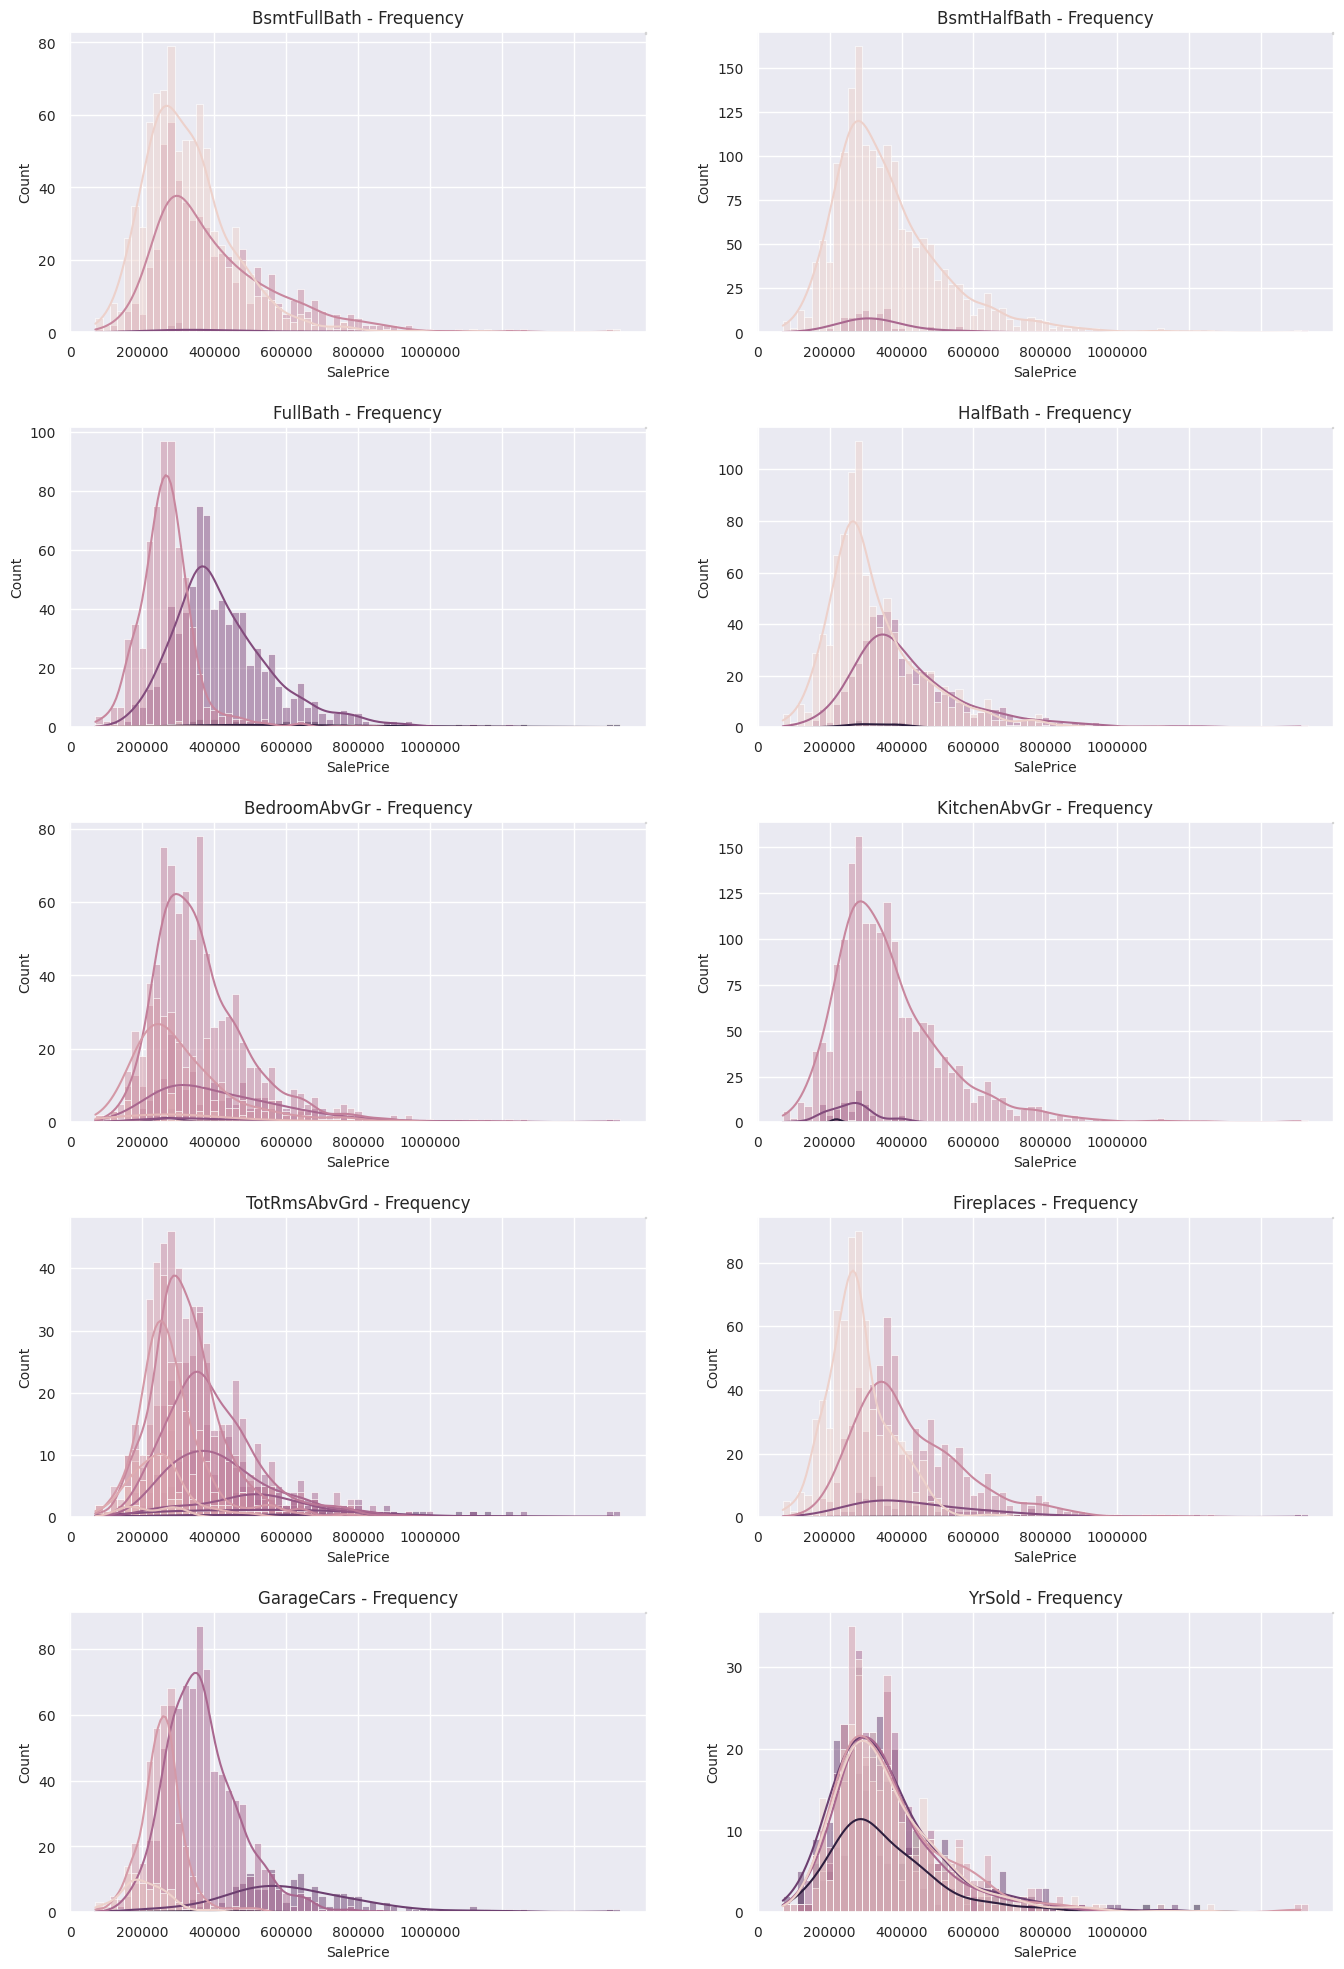

In [ ]:
numerical_categorical_features = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
                              'Fireplaces', 'GarageCars', 'YrSold']
print(numerical_categorical_features)
print(f'Number of numerical categorical features: {len(numerical_categorical_features)}')

fig = plt.figure(figsize=(14,20))


for i, feat in enumerate(numerical_categorical_features):
    ax=fig.add_subplot( int((len(numerical_categorical_features)+1)/2),2,i+1)

    sns.histplot(data=train_v0, x='SalePrice', hue=feat, binwidth=10000, kde=True)

    ax.set_title(f'{feat} - Frequency', fontsize=12)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)
    ax.legend(fontsize=0)



fig.tight_layout()  # Improves appearance a bit
plt.show()



### Looking at Continuous Data - Scatter Plots

Let's make a scatter plot from continuous data

Number of continous features: 22


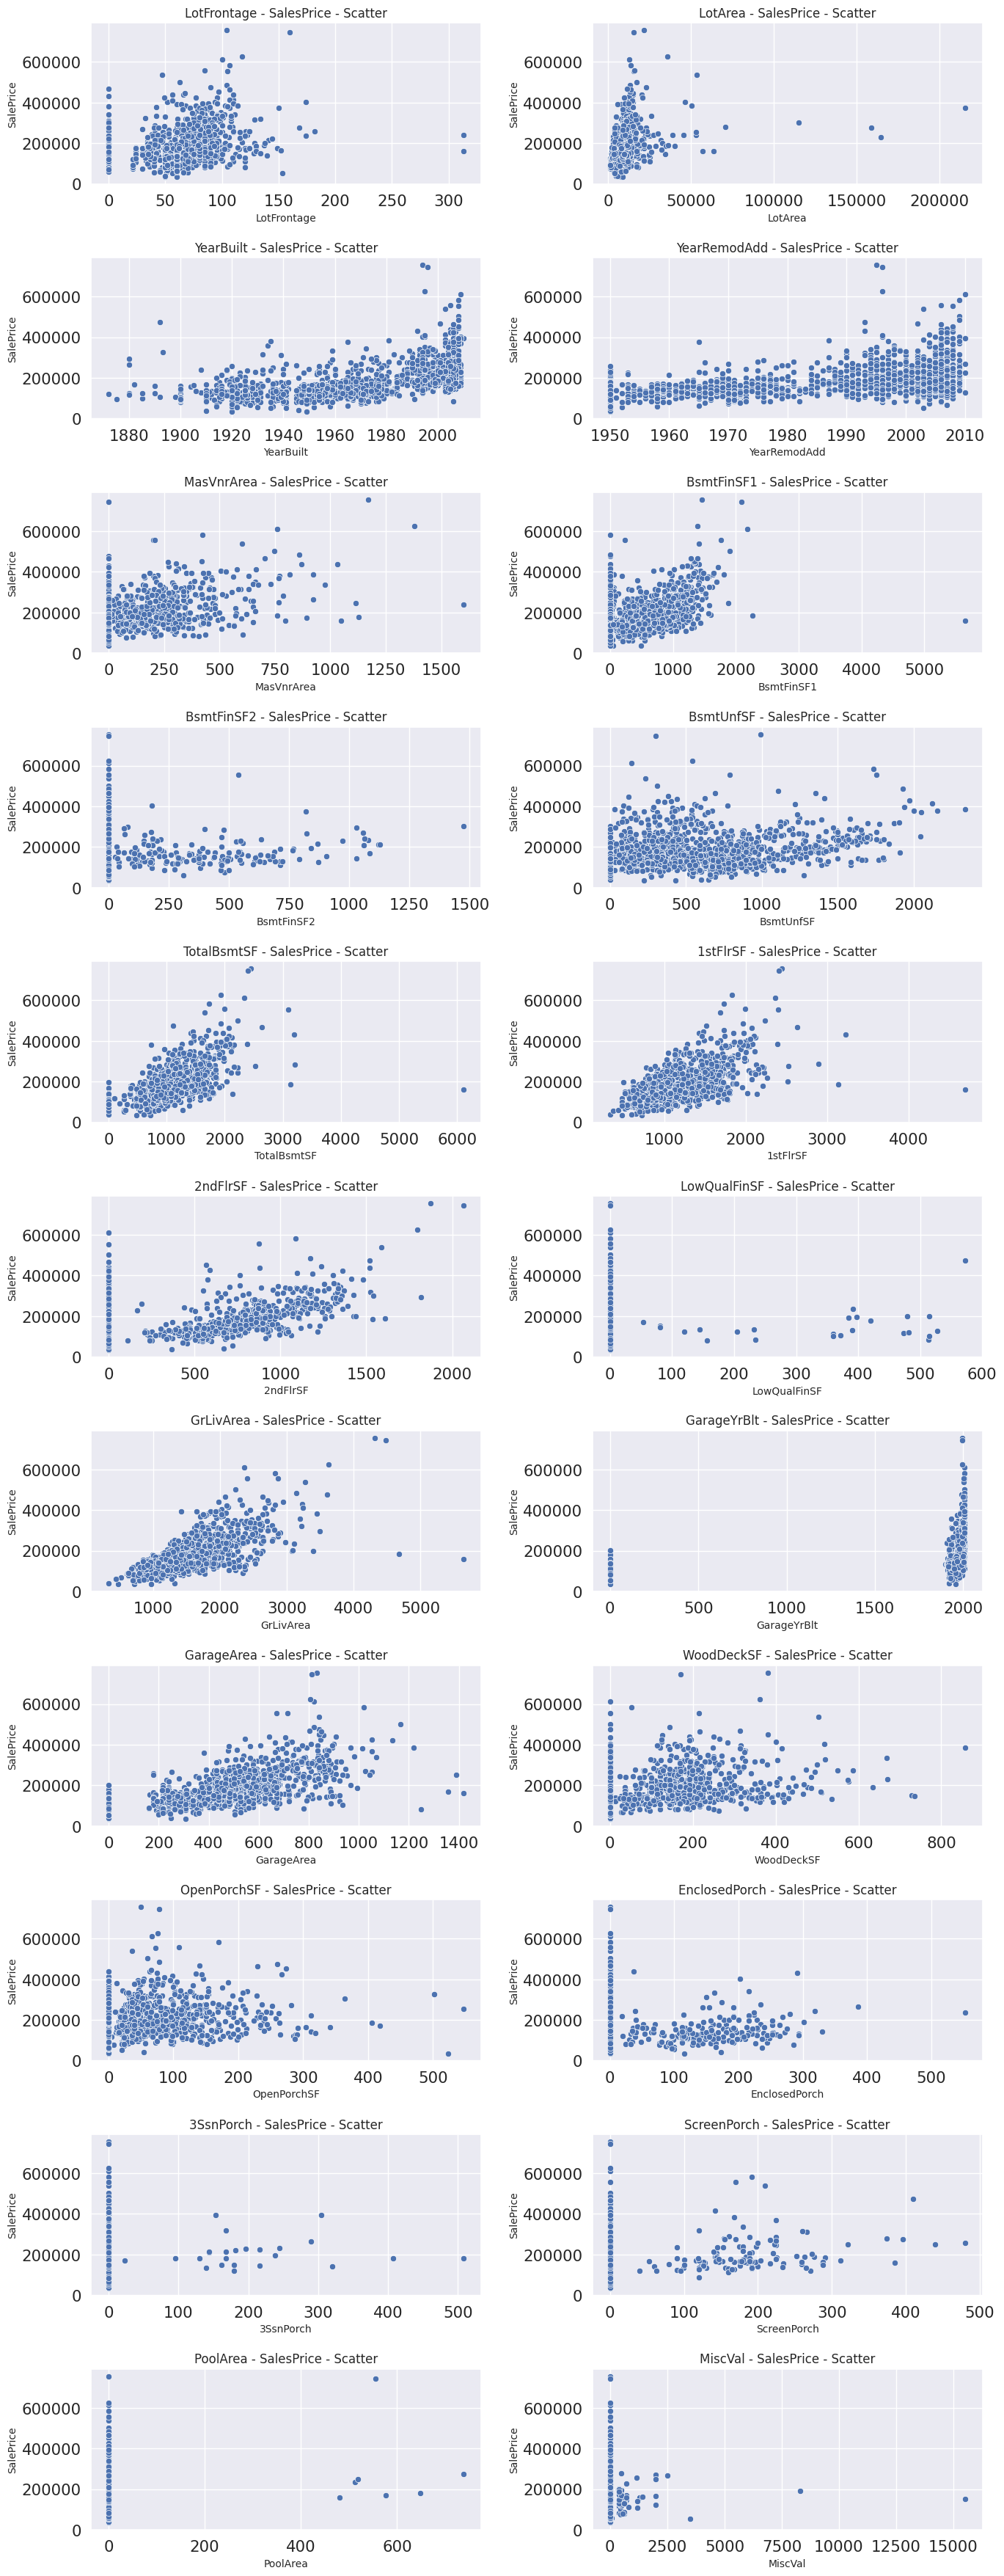

In [ ]:
continuous_features = list(filter(lambda x : x not in numerical_categorical_features, numerical_features))
print(f'Number of continous features: {len(continuous_features)}')

fig = plt.figure(figsize=(14,150))
plt.rcParams['axes.labelsize'] = 10
for i, feat in enumerate(continuous_features):
    ax=fig.add_subplot( int(len(categorical_features)+1/2),2,i+1)
    sns.scatterplot(x=feat, y='SalePrice', data=train_v0  )
    ax.set_title(f'{feat} - SalesPrice - Scatter', fontsize=12)
    #ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
    #ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)


fig.tight_layout()  # Improves appearance a bit
plt.show()

# Pre Processing


## Log Scaling
Looking Log scale at continuous features

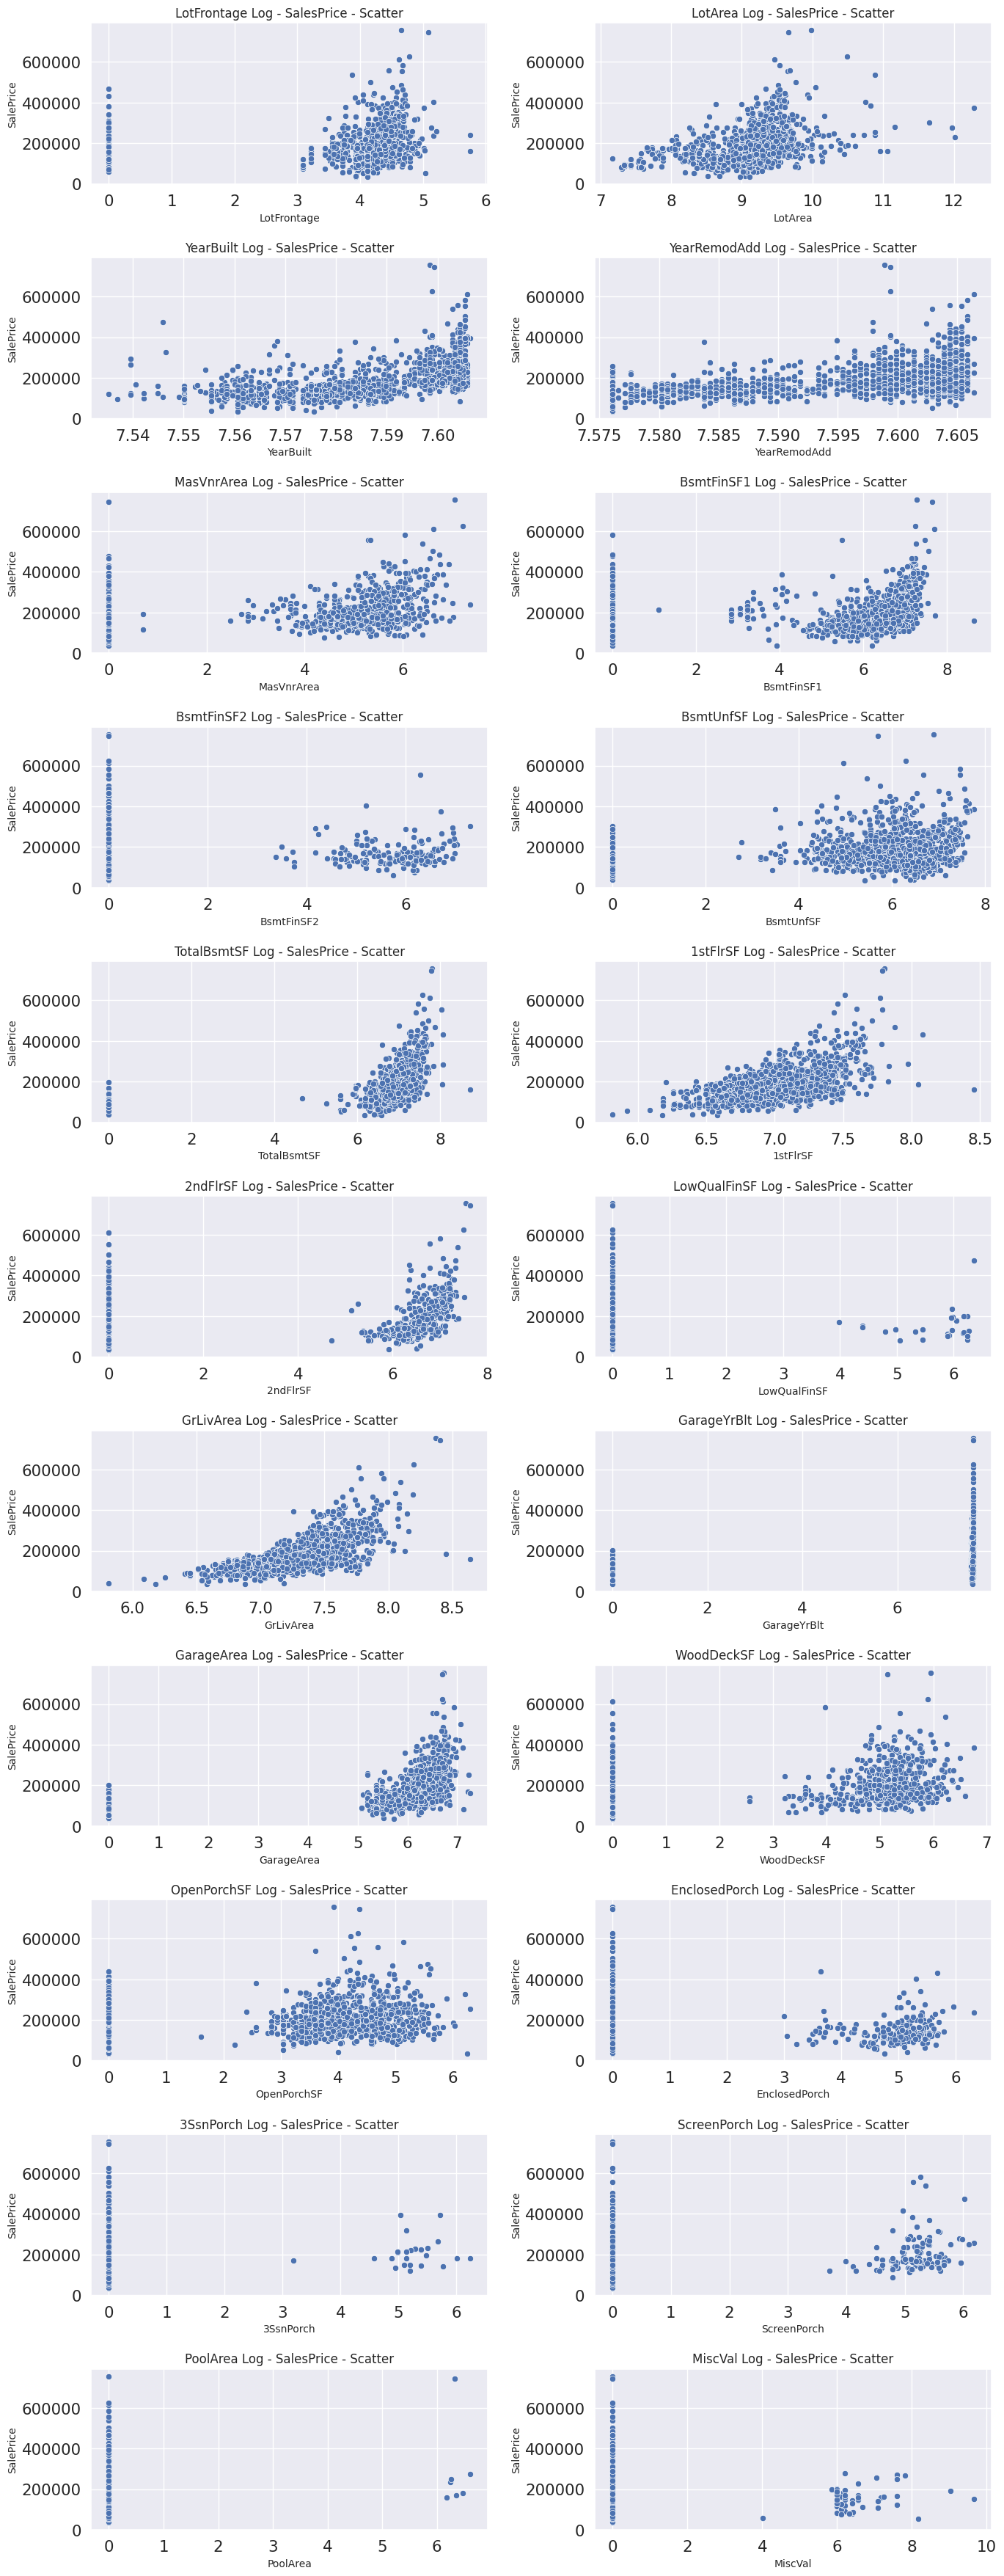

In [ ]:
train_v1_preprocess = train_v0.copy()
test_v1_preprocess = test_v0.copy()

for feat in continuous_features:
    train_v1_preprocess[feat]=np.log(1+train_v1_preprocess[feat])
    test_v1_preprocess[feat]=np.log(1+test_v1_preprocess[feat])

fig = plt.figure(figsize=(14,150))
plt.rcParams['axes.labelsize'] = 10
for i, feat in enumerate(continuous_features):
    ax=fig.add_subplot( int(len(categorical_features)+1/2),2,i+1)
    sns.scatterplot(x=feat, y='SalePrice', data=train_v1_preprocess  )
    ax.set_title(f'{feat} Log - SalesPrice - Scatter', fontsize=12)
    #ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
    #ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)


fig.tight_layout()  # Improves appearance a bit
plt.show()

## Divide into x and y features.



In [ ]:
train_v1_Y = train_v1_preprocess['SalePrice'].copy()
train_v1_X = train_v1_preprocess.drop('SalePrice', axis=1).copy()

print(train_v1_Y.shape)
print(train_v1_X.shape)
print(train_v1_preprocess.shape)
print(test_v1_preprocess.shape)

(1460,)
(1460, 91)
(1460, 92)
(1459, 91)


## Pipelines

Making pipelines to:
* Scaling numerical data to mean = 0 and variance = 1
* Make one-hot encoding for categorial values

In [ ]:
numerical_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(drop='if_binary', handle_unknown='ignore',sparse=False))])


train_test_concat = pd.concat([train_v1_X,test_v1_preprocess])

# Combine preprocessing
ct = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)],
        remainder='passthrough')

ct.fit(train_test_concat)

train_v1_X = ct.transform(train_v1_X)
test_v1 = ct.transform(test_v1_preprocess)

# Print new shape
print('Training set shape:', train_v1_X.shape)
print('Test set shape:', test_v1.shape)


#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Training set shape: (1460, 363)
Test set shape: (1459, 363)


## Looking at PCA



In [ ]:
pca = PCA(n_components=3)
components = pca.fit_transform(train_v1_X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=train_v1_Y, size=0.1*np.ones(len(train_v1_X)), opacity = 1,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'},
    width=800, height=500
)
fig.show()

## Train/Test set
Let's make a train trest set.

In [ ]:


# Train-validation split
train_v2_X_t, train_v2_X_v, train_v2_y_t, train_v2_y_v = train_test_split(train_v1_X,train_v1_Y,train_size=0.8,test_size=0.2,random_state=0)

# MODELING

Let's train and evaluate models using Random Forests

In [ ]:
from sklearn.metrics import mean_absolute_error



def get_mae(max_estimators, train_X, val_X, train_y, val_y):
    model = RandomForestRegressor(n_estimators=max_estimators, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)
'''
for i in range(1,100,2):
    mae_aux = get_mae(i,train_v2_X_t,train_v2_X_v, train_v2_y_t,train_v2_y_v)
    print(f'Number of estimators: {i} \t - \t Mean Absolute Error: {mae_aux}' )
'''
RandomForest = RandomForestRegressor(n_estimators=37, random_state=0)
RandomForest.fit(train_v1_X,train_v1_Y)
predicted = RandomForest.predict(test_v1)

print(predicted)

test_v2_y_predicted = pd.DataFrame({'Id' : test_v1_preprocess['Id'], 'SalePrice' : predicted})
#test_v2_y_predicted.set_index('Id', inplace=True)
print('\n')
print(test_v2_y_predicted.head())


test_v2_y_predicted.to_csv('/kaggle/working/test_y_predicted.csv',index=False)



[130879.48648649 152210.81081081 189197.2972973  ... 144861.05405405
 107812.16216216 219912.91891892]


     Id      SalePrice
0  1461  130879.486486
1  1462  152210.810811
2  1463  189197.297297
3  1464  184867.567568
4  1465  192313.810811
